In [23]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import glob

In [24]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Extracting data and labels**

In [194]:
files=glob.glob('/content/drive/My Drive/Data/emotion_classification/train/*.gif')

In [195]:
from PIL import Image
i=[]
y=[]
for file in files:
  i.append(np.array(Image.open(file)).flatten())
  if file.find("sad")!=-1:
    y.append(0)
  else:
    y.append(1)
print(y)

[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]


# **Standardizing the data**

In [196]:

x=np.array(i)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(x)
X_scaled

array([[ 0.13084919,  0.23797385,  0.28274725, ..., -0.65346227,
        -0.75135426, -0.82742488],
       [ 0.742294  ,  0.90430064,  1.05070274, ..., -0.18090198,
        -0.25176613, -0.327509  ],
       [ 0.27759595,  0.49974509,  0.79471758, ..., -0.5353222 ,
        -0.58044253, -0.60951283],
       ...,
       [ 0.91349855,  1.04708496,  1.00415998, ..., -0.01845939,
        -0.12029556, -0.30187229],
       [ 0.00856023, -0.09518954, -0.2059517 , ..., -0.72729982,
        -0.77764837, -0.87869831],
       [-1.04312485, -0.99949019, -0.92736443, ..., -0.59439224,
        -0.67247192, -0.82742488]])

# **Applying High Dimension PCA**

In [197]:
dummy=np.dot(X_scaled,np.transpose(X_scaled))
dummy.shape

e_value,e_vector=np.linalg.eigh(dummy)
e_vector=np.transpose(e_vector)

# **finding the value of K**

In [198]:

total_var = 0.0
for i in range(20):
  total_var = total_var + e_value[i]
local_var=0.0
for i in range(20):
  local_var= local_var+ e_value[19 - i]
  print("number of eigen value ",i+1,"varience explaine(%)",(local_var/total_var)*100)

number of eigen value  1 varience explaine(%) 28.600188932919018
number of eigen value  2 varience explaine(%) 42.57648407715873
number of eigen value  3 varience explaine(%) 51.65794283966964
number of eigen value  4 varience explaine(%) 58.456645686018305
number of eigen value  5 varience explaine(%) 64.76936914467068
number of eigen value  6 varience explaine(%) 70.40155537425274
number of eigen value  7 varience explaine(%) 75.07612431100017
number of eigen value  8 varience explaine(%) 79.11120716533873
number of eigen value  9 varience explaine(%) 82.3005272018994
number of eigen value  10 varience explaine(%) 85.30494355185763
number of eigen value  11 varience explaine(%) 88.11401446769509
number of eigen value  12 varience explaine(%) 90.48591370151783
number of eigen value  13 varience explaine(%) 92.41545182250253
number of eigen value  14 varience explaine(%) 94.2109568544254
number of eigen value  15 varience explaine(%) 95.64800366594443
number of eigen value  16 varience

In [199]:
import math
a=[]
i=0
X_t=np.transpose(X_scaled)
K=18
for i in range(K):
  d=math.sqrt(20*e_value[len(e_value)-1-i])
  a.append(np.dot(X_t,e_vector[len(e_value)-1-i])/d)
a=np.array(a)
a.shape

#a is the matrix of eigen vector of X^T.X (eigen vectors present in row wise form)
p=np.dot(a,np.transpose(X_scaled))

p=np.transpose(p)

#p is our projection on low dimension



In [200]:
p


array([[-2.96375157e-03,  9.61501880e+00,  5.04501853e+00,
        -5.01629088e+00,  3.69019659e+00, -5.95843255e+00,
         2.39310144e+00, -6.48368969e+00,  8.06929240e+00,
        -4.17301665e-01,  7.17539989e-02, -4.48149205e+00,
         3.24985877e+00,  6.92576118e+00, -4.26149781e-01,
         1.24277147e+00, -5.52820575e-01,  6.42479961e-01],
       [-3.94376047e+00, -2.81701956e+00,  2.61329999e+00,
        -1.35661676e+01,  6.47233409e+00, -3.62471803e+00,
         6.98352197e-01,  5.04937053e+00, -9.94199332e-01,
        -4.38318774e+00, -2.17143032e+00, -2.07970574e+00,
        -3.77212827e+00, -3.12058124e+00,  3.80020132e+00,
         5.02849130e+00,  5.66458051e-01, -4.95842479e-01],
       [ 3.74509374e+00, -6.67306361e+00, -2.80013820e+00,
        -9.48230580e+00,  2.83517707e+00,  1.74445104e+00,
         2.61575771e+00,  6.18514761e-01, -2.03550614e+00,
        -4.77333781e-01,  3.47130438e-01,  4.64799620e+00,
         2.26298288e+00, -4.73845023e-01, -6.57958803e

# **Linear Discriminant Analysis**

In [201]:
c1=[]
c2=[]
for i in range(p.shape[0]):
  if(y[i]==0):
    c1.append(p[i])
  else:
    c2.append(p[i])
np.array(c1).shape
m1=np.mean(np.array(c1),axis=0)
m2=np.mean(np.array(c2),axis=0)



# **Calculating S_b ( between class covarience matrix )**

In [202]:

sub=np.subtract(m2,m1)
print(sub.shape)
sb=np.outer(sub,sub)
print(sb.shape)


(18,)
(18, 18)


# **Calculating S_w (Within Class Covarience Matrix)**

In [203]:
cov1=np.cov(np.transpose(np.array(c1)))
cov2=np.cov(np.transpose(np.array(c2)))
sw=np.add(cov1,cov2)
sw.shape

(18, 18)

In [204]:
res_matrix=np.dot(np.linalg.inv(sw),sb)
res_matrix.shape

(18, 18)

In [205]:
e_val,e_vect=np.linalg.eigh(res_matrix)
e_vect1=np.transpose(e_vect)
w=e_vect1[K-1]
w.shape
#W is the vector of (Sw^-1).(Sb)


(18,)

# **testing LDA on train data**

In [206]:
y_new=np.dot(p,w)

In [207]:
y_new


array([  6.37081737,   6.16093577,   0.44900403,  -7.01321429,
         6.4872155 ,  -6.63217476,   6.23181502,  -6.28226779,
         8.03808282,  -0.49316948,  -3.78440432,  -3.93484147,
       -10.95419478,  -1.08589375,   7.78351419,   4.19588522,
         1.34577922,  -3.88679505,  -5.62592945,   2.62983601])

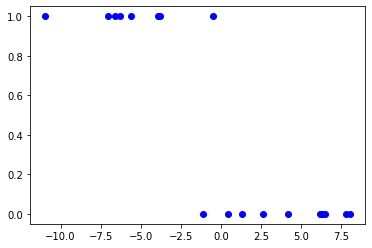

In [208]:

plt.plot(y_new,np.array(y),"ob")

# **Extracting Test data**


In [209]:
from PIL import Image
i_test=[]
y_test=[]
files=glob.glob('/content/drive/My Drive/Data/emotion_classification/test/*.gif')
for file in files:
  i_test.append(np.array(Image.open(file)).flatten())
  if file.find("sad")!=-1:
    y_test.append(0)
  else:
    y_test.append(1)
x_test=np.array(i_test)



In [210]:
S=StandardScaler().fit(x)
x_test_scaled=S.transform(x_test)

# **PCA on test data**


In [211]:
p_test=np.dot(a,np.transpose(x_test_scaled))

print(p_test.shape)

(18, 10)


# **LDA on test data**

In [212]:
y_test_new=np.dot(p_test.T,w)

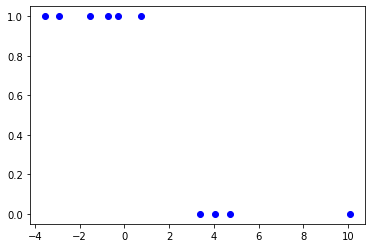

In [213]:

plt.plot(y_test_new,np.array(y_test),"ob")

In [214]:
y_test_predict=[]
for i in range(10):
  if(y_test_new[i]<0):
    y_test_predict.append(1)
  else:
    y_test_predict.append(0)
  
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predict)

0.9